<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 : Decision Trees 🌳

In [1]:
#  The following code trains a DecisionTreeClassifier on the iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:

tree_clf2 = DecisionTreeClassifier(max_depth = 2, random_state = 11)
tree_clf2.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=11)

In [3]:
#visualize the trained decision tree by  export_graphviz()
# outputs a graph definition file called iris_tree.dot

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names  = iris.target_names,
    rounded = True,
    filled = True
)

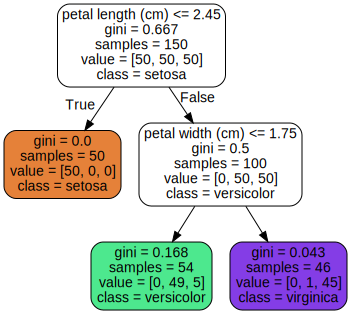

In [4]:
#use graphviz.Source.from_file() to load and display in Jupyter notebook
from graphviz import Source
Source.from_file("iris_tree.dot")

In [5]:
export_graphviz(
    tree_clf2,
    out_file = "iris_tree2.dot",
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names  = iris.target_names,
    rounded = True,
    filled = True
)

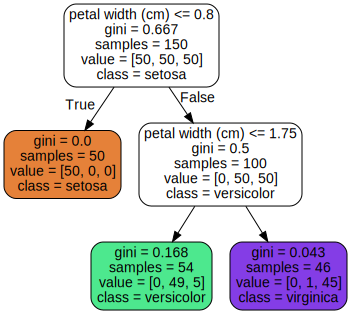

In [6]:
Source.from_file("iris_tree2.dot")

Graphviz is an open source graph visualization software package. It also includes a
dot command-line tool to convert .dot files to a variety of formats, such as PDF or
PNG.


https://graphviz.org/

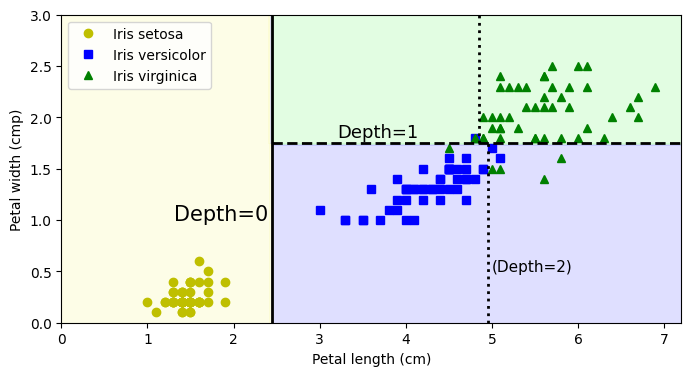

In [7]:
# MAking Predictions
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.figure(figsize=(8,4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha = 0.3, cmap = custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names,("yo", "bs", "g^"))):
  plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
           style, label = f"Iris {name}")
  

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state= 42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cmp)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()


In [8]:
# access the tree structure via the `tree_` attribute
tree_clf.tree_

In [9]:
# for more info:
import sklearn.tree
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [10]:
# estimation class probabilities
tree_clf.predict_proba([[5 , 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularization Hyperparameters

In [12]:
"""
test regularization on the moons dataset
one decision tree without regularization, and another with min_samples_leaf=5"""

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples= 150, noise = 0.2, random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf= 5, random_state= 42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

Text(0, 0.5, '')

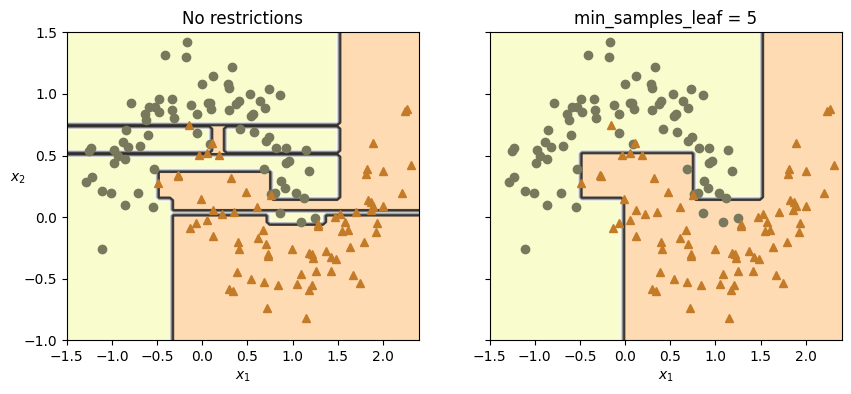

In [13]:
def plot_decision_boundary(clf, X, y, axes, cmap):
  x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = cmap)
  plt.contour(x1, x2, y_pred, cmap = "Greys", alpha = 0.8)
  colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1" : ["red", "blue"]}
  markers = ("o", "^")
  for idx in (0, 1):
    plt.plot(X[:, 0][y == idx], X[:, 1][y==idx],
             color = colors[cmap][idx], marker = markers[idx], linestyle = "none")
    
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation = 0)

fig, axes = plt.subplots(ncols = 2, figsize = (10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")



In [14]:
X_moons_test, y_moons_test = make_moons(n_samples = 1000, noise = 0.2, 
                                        random_state = 43)

tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [15]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# Regression

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

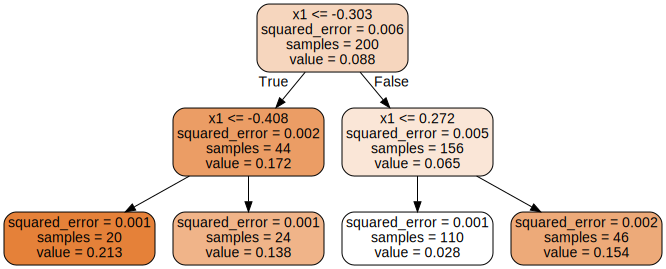

In [17]:
export_graphviz(
    tree_reg,
    out_file = "reg_tree.dot",
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file("reg_tree.dot")


In [18]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

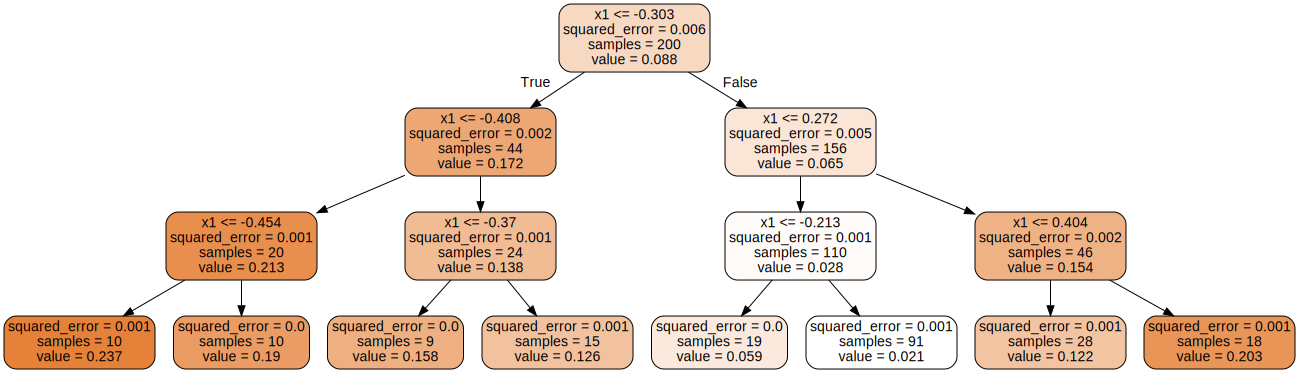

In [19]:
export_graphviz(
    tree_reg2,
    out_file = "reg_tree2.dot",
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file("reg_tree2.dot")


In [20]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [21]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

Text(0.5, 1.0, 'max_depth=3')

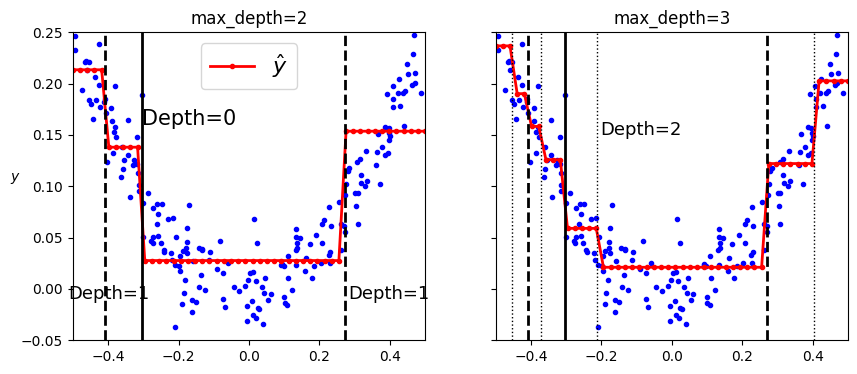

In [22]:
"""
Syntax: matplotlib.pyplot.sca(self, a)

Parameters: This method accept the following parameters that are discussed below:

a:This parameter is the current axes.
Returns: This method returns the axes."""


def plot_regression_predictions(tree_reg, X, y, axes = [-0.5, 0.5, -0.05, 0.25]):
  x1 = np.linspace(axes[0], axes[1]).reshape(-1, 1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.plot(X, y, "b.")
  plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")



  

Text(0.5, 1.0, 'min_samples_leaf=10')

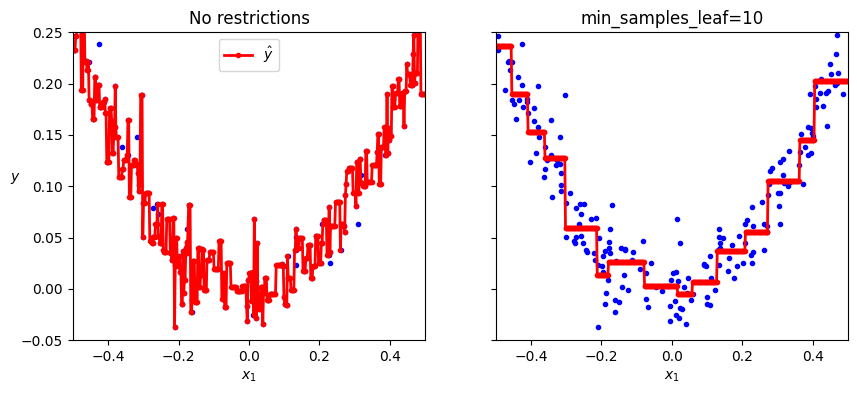

In [23]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")


# Sensitivity to axis orientation
Rotating the dataset also leads to completely different decision boundaries:

Text(0, 0.5, '')

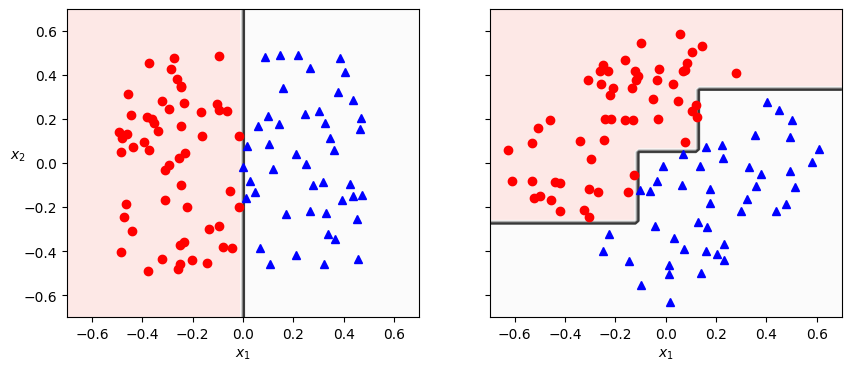

In [27]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[: , 0] > 0).astype(np.int64)

angle = np.pi / 4 #45 degree
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])

X_rotated_square = X_square.dot(rotation_matrix)
tree_clf_square = DecisionTreeClassifier(random_state = 42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state = 42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols = 2 , figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes = [-0.7, 0.7 , -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes = [-0.7, 0.7 , -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

In [31]:
# using PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

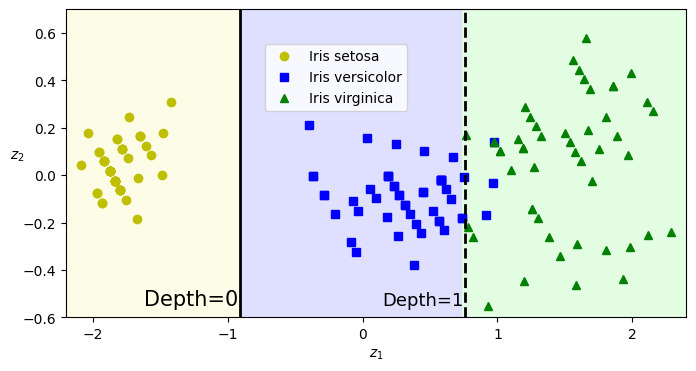

In [32]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

#Decision Trees Have High Variance

small changes in the dataset (such as a rotation) may produce a very different Decision Tree. 
training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. 
 set random_state to a different value than earlier:

In [33]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

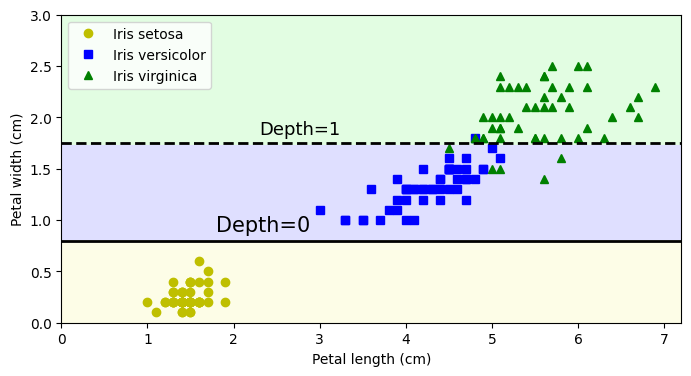

In [34]:

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()


In [35]:
"""Accessing the tree structure
A trained DecisionTreeClassifier has a tree_ 
attribute that stores the tree's structure:"""
tree = tree_clf.tree_
tree

In [36]:
tree.node_count

5

In [37]:
tree.max_depth

2

In [38]:
tree.n_features

2

In [39]:
tree.max_n_classes

3

In [40]:
tree.n_outputs

1

In [41]:
tree.n_leaves

3

In [42]:
tree.impurity #impurity of each node

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

In [44]:
"""
The root node is at index 0. The left and right children nodes
 of node i are tree.children_left[i] and tree.children_right[i]"""

tree.children_left[0], tree.children_right[0]

(1, 2)

In [46]:
"""
When the left and right nodes are equal, it means this is a leaf node
 (and the children node ids are arbitrary):"""

tree.children_left[3], tree.children_right[3]

(-1, -1)

In [47]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

In [48]:
"""
Non-leaf nodes are called split nodes. The feature they split is available
 via the feature array. Values for leaf nodes should be ignored:"""
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [49]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [50]:
"""And the number of instances per class 
that reached each node is available too:

"""
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [51]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [52]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

True

In [53]:
#how you can compute the depth of each node:


def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

In [54]:
#how to get the thresholds of all split nodes at depth 1:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

In [55]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])